<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-11' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_ID&Name = "Barry Lawton 20197772" #@param {type:"string"}
Student_ID&Name = "Barry Lawton 20197772" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [2]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [5]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
!pip install gpy

     |████████████████████████████████| 959 kB 13.4 MB/s 
     |████████████████████████████████| 71 kB 7.4 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565118 sha256=16c83849a8ab7714659b4d572c69db441cab3f245cf584a89d20e489f14e8f7a
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=aabaa94ad22ba698b84cdd2136011ea84252cfb5ecadcf46fd5df155ea0a78c1
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [8]:
import seaborn as sns
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [10]:
Path = '/content/drive/My Drive/Data/ET5003_Etivity_3/'

train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

# We don't need the sample submission, this needs to be created from model predictions, keeping it just for reference
#sample_submission = Path + 'sample_submission.csv'

In [11]:
# train data
df_train = pd.read_csv(train_data)
print("Training dataset shape : ",df_train.shape)

# test data
df_test = pd.read_csv(test_data)
print("Test dataset shape : ",df_test.shape)

# sample submission example
# df_sample = pd.read_csv(sample_submission)
# print("Sample_Submission dataset shape : ",df_sample.shape) 

Training dataset shape :  (1638, 14)
Test dataset shape :  (702, 13)


In [12]:
df_train.isna().sum()
#df_test.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [13]:
df_train.set_index('Index',inplace=True)
df_test.set_index('Index',inplace=True)

In [14]:
df_train.head(6)

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
Index,,,,,,,,,,,,,
1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000
6,12225979,Glasnevin,1,3,E1,Property Team Lappin Estates take great pleasu...,NaN,None,53.380367,-6.279310,terraced,140.00,360000


In [15]:
df_test.head()

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
Index,,,,,,,,,,,,
1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [16]:
df_train.dtypes

ID                 int64
Location          object
Num_Bathrooms      int64
Num_Beds           int64
BER_class         object
Description       object
Services          object
Features          object
Latitude         float64
Longitude        float64
Type              object
Surface          float64
Price              int64
dtype: object

In [17]:
df_train.describe()
#df_test.describe()

,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


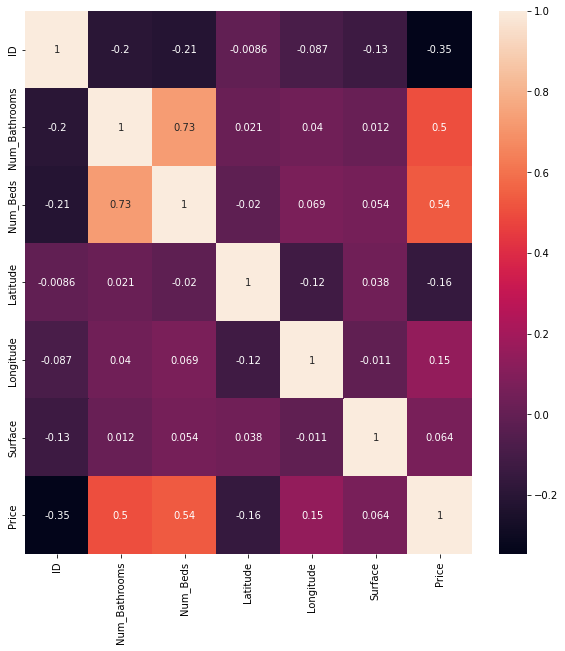

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

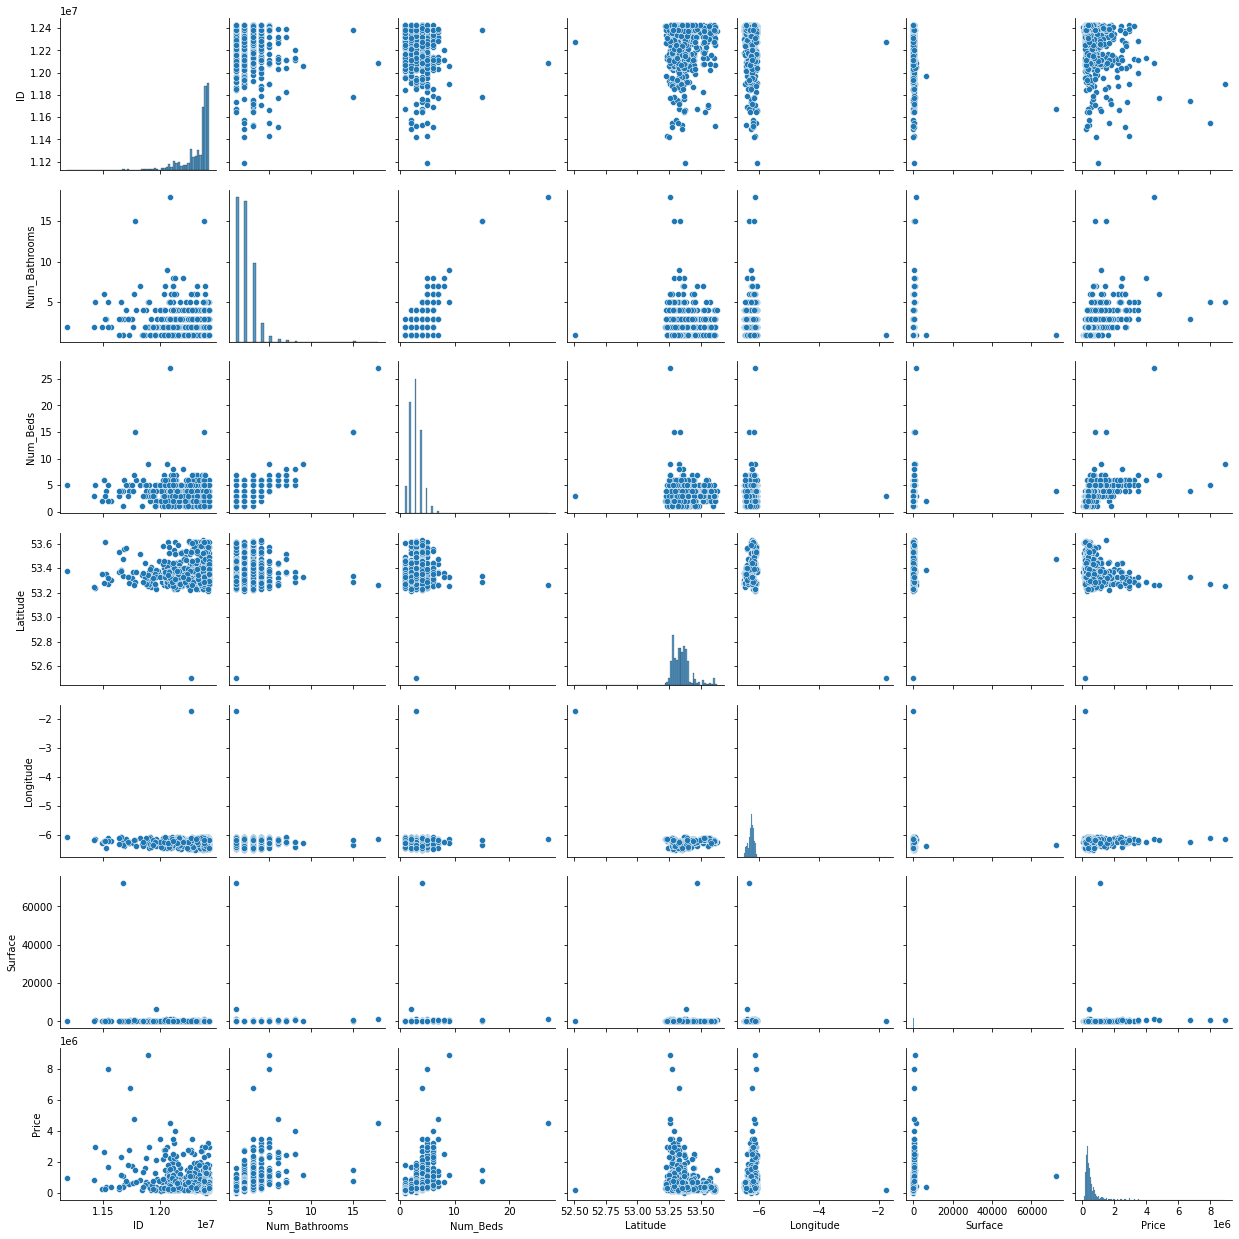

In [19]:
sns.pairplot(df_train)
plt.show()
# sns.pairplot(df_test)
# plt.show()

Some of the numberical features contain outliers which I will remove to make the training data evenly distributed

In [20]:
# Removing numerical outliers
def remove_outliers(df_train, num_columns, threshold = 1.5):

  if (type(num_columns) == list):

    for i,col in enumerate(num_columns):
      q1 = df_train[col].quantile(0.25)
      q3 = df_train[col].quantile(0.75)
      iqr = q3 - q1     
      df_no_outlier = df_train[(df_train[col] > q1 - threshold*iqr ) & (df_train[col] < q3 + threshold*iqr)]
  
  elif (type(num_columns)==str):

    q1 = df_train[num_columns].quantile(0.25)
    q3 = df_train[num_columns].quantile(0.75)
    iqr = q3 - q1     
    df_no_outlier = df_train[(df_train[num_columns] > q1 - threshold*iqr ) & (df_train[num_columns] < q3 + threshold*iqr)]
  else:
    print('Please select either one feature or list of features')

  return df_no_outlier

In [21]:
num_columns = ['Num_Bathrooms','Num_Beds','Surface']

df_train = remove_outliers(df_train,num_columns[0:2])


In [22]:
#df_train = remove_outliers(df_train,num_columns[2],threshold=5)
df_train = df_train[(df_train['Surface']<5000)]

Initially I had removed Surface outliers with the same thresholds as Num_Bathrooms and Num_Bedrooms, however this was causing some excessively large Price estimates in the Kaggle submission file. Instead I have settled with setting the upper threshold for `Surface` as 5000 and found I produced lower errors on the validation set and on the Kaggle submission for each of the models trained. 

In [23]:
df_train[(df_train['Latitude']<53) | (df_train['Longitude']>-4)]

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
Index,,,,,,,,,,,,,
356,12270559,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,NaN,None,52.501856,-1.744995,semi-detached,79.0,199000


Looking at the earlier pairplots, there is one outlier for both Latitude and Longitude.       
After investigating further, the  co-ordinates are for an address in Birmingham,UK, so I will drop this example

In [24]:
df_train.drop(index=356,axis=1,inplace=True)


## Cathegorical variables

In [25]:
ber_mapper = {
    'A1':1,'A2':2,'A3':3,
    'B1':4,'B2':5,'B3':6,
    'C1':7,'C2':8,'C3':9,
    'D1':10,'D2':11,
    'E1':12,'E2':13,
    'F':14,
    'G':15,
    'SINo666of2006exempt':16,
    np.nan:17
}

df_train['BER_class'] = df_train['BER_class'].replace(ber_mapper)
df_test['BER_class'] = df_test['BER_class'].replace(ber_mapper)

In [26]:
df_train[['Type','Price']].groupby(['Type']).mean().sort_values(by='Price')

,Price
Type,
studio,2.425000e+05
apartment,3.302488e+05
duplex,3.465455e+05
end-of-terrace,4.572628e+05
townhouse,4.775000e+05
terraced,4.875207e+05
bungalow,5.381956e+05
semi-detached,5.381967e+05
site,7.500000e+05


In [27]:
# df_train = pd.get_dummies(df_train, columns=['Type'], drop_first=False)
# df_test = pd.get_dummies(df_test, columns=['Type'], drop_first=False)

type_map = {
     'apartment':2,
     'bungalow':7,
     'detached':8, 
     'duplex':1,
     'end-of-terrace':3,
     'semi-detached':6,
     'site':9,
     'studio':0,
     'terraced':4,
     'townhouse':5
    
}
df_train['Type'] = df_train['Type'].replace(type_map)
df_test['Type'] = df_test['Type'].replace(type_map)

As `BER_Class` is an ordinal cathegorical variable I have decided to encode with the use of the mapper above. I have inputed NaN values with the last class, however I may revisit this decision. It might be worthwhile to impute a value for one of the existing BER ratings.      
I have encoded `Type` with the mapper above,  based on ordering the mean Price of property for each class. Initially I had one hot encoded this feature but this led to some issues as not all of the test set had observations in each property type.
  

In [28]:
#df_train.isna().sum()
#df_test.isna().sum()

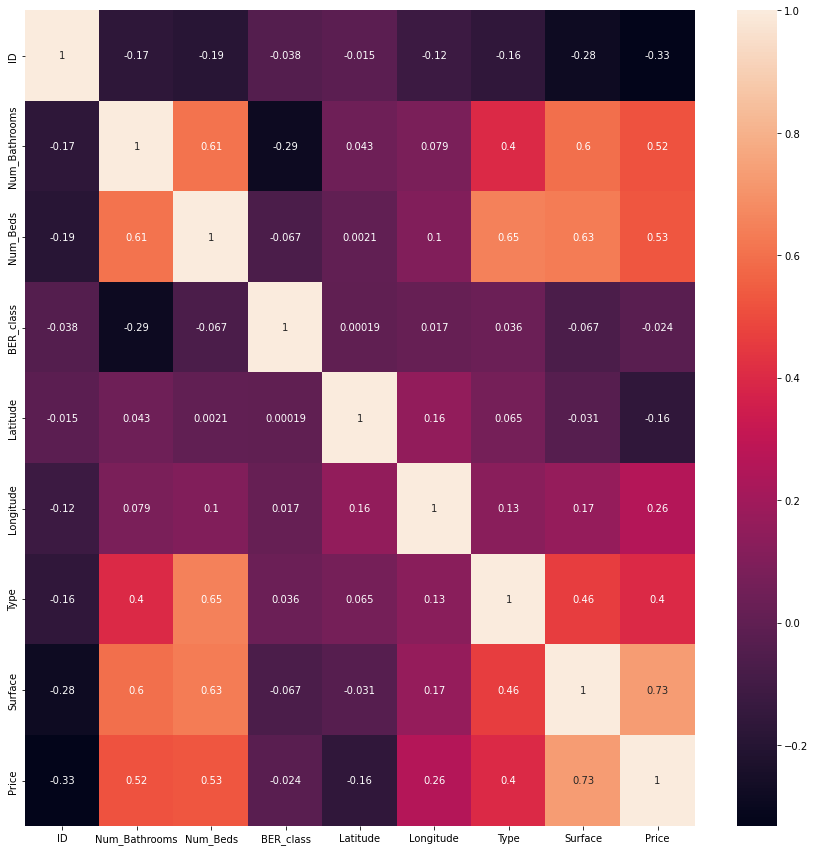

In [29]:
plt.figure(figsize = (15,15))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

# sns.pairplot(df_train)
# plt.show()


In [30]:
df_train.columns

Index(['ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Description', 'Services', 'Features', 'Latitude', 'Longitude', 'Type',
       'Surface', 'Price'],
      dtype='object')

In [31]:
df_test.columns

Index(['ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Description', 'Services', 'Features', 'Latitude', 'Longitude', 'Type',
       'Surface'],
      dtype='object')

In [32]:
df_cost = df_train['Price']
df_train.drop(['ID','Location','Price'],axis=1,inplace=True)
df_test.drop(['ID','Location'],axis=1, inplace=True)
df_test.head()

,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
Index,,,,,,,,,,
1639,2,2,8,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,5,65.0
1640,2,5,12,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,6,142.0
1641,1,2,15,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,8,80.0
1642,4,4,2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,8,209.0
1643,2,3,14,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,3,108.0


## Training & Test Data

### Train dataset

In [33]:
# show first data frame rows 
df_train.head(3)

,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
Index,,,,,,,,,,
1,2,2,9,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,2,67.00
2,1,2,10,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,4,95.97
3,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,6,107.00


In [34]:
# Generate descriptive statistics
df_train.describe()

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,1.996289,2.973408,10.946815,53.351080,-6.258055,4.542981,118.204002
std,1.013516,1.099577,3.821790,0.074032,0.091837,2.162527,86.343714
min,1.000000,1.000000,1.000000,53.215381,-6.497000,0.000000,3.400000
25%,1.000000,2.000000,8.000000,53.294461,-6.309640,2.000000,72.400000
50%,2.000000,3.000000,11.000000,53.341263,-6.247912,4.000000,96.480000
75%,3.000000,4.000000,14.000000,53.382401,-6.194687,6.000000,134.000000
max,8.000000,6.000000,17.000000,53.630588,-6.054719,9.000000,1195.000000


### Test dataset

In [35]:
# show first data frame rows 
df_test.head(3)

,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
Index,,,,,,,,,,
1639,2,2,8,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,5,65.0
1640,2,5,12,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,6,142.0
1641,1,2,15,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,8,80.0


In [36]:
# Generate descriptive statistics
df_test.describe()

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,2.027066,2.987179,10.968661,53.350445,-6.252411,4.450142,132.603530
std,1.071273,1.198480,3.931894,0.073961,0.091600,2.182068,330.347066
min,1.000000,1.000000,2.000000,53.214227,-6.521183,1.000000,32.100000
25%,1.000000,2.000000,8.000000,53.295225,-6.304258,2.000000,73.000000
50%,2.000000,3.000000,11.000000,53.341153,-6.247799,4.000000,99.200000
75%,3.000000,4.000000,14.000000,53.381752,-6.184277,6.000000,136.875000
max,9.000000,14.000000,17.000000,53.617443,-6.057150,9.000000,8576.000000


### Expected Cost dataset

In [37]:
df_cost.head()

Index
1    195000
2    425000
3    535000
4    499000
5    510000
Name: Price, dtype: int64

In [38]:
# # Generate descriptive statistics
df_cost.describe()

count    1.617000e+03
mean     5.384643e+05
std      4.995053e+05
min      1.999500e+04
25%      2.950000e+05
50%      3.950000e+05
75%      5.950000e+05
max      7.950000e+06
Name: Price, dtype: float64

In [39]:
def rmsle(y_predicted, y_actual):
  """
  Function to calculate the root mean squared log error(RMSLE)
  Returns RMSLE
  """

  return np.sqrt(mean_squared_error((np.log(y_predicted)+1),(np.log(y_actual)+1) ) )

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

### NLP of Text data

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.tree import DecisionTreeRegressor as dtr
from  sklearn.metrics import mean_squared_error, mean_absolute_error


In [41]:
nlp_features = ["Description","Services", "Features"] 
df_train_text =df_train[nlp_features]
df_train_text.head()

,Description,Services,Features
Index,,,
1,DNG are delighted to present to the market no....,NaN,None
2,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...
3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...
4,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...
5,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...


In [42]:
df_train_text.isna().sum()

Description       0
Services       1043
Features          0
dtype: int64

In [43]:
def nlp_tasks(data, min_chars = 3):
  """
  Function performing all the NLP pre-processing tasks to an Pandas DataFrame
  Tasks are as follows:
  1.Remove all characters which are not letters
  2.Remove all short words under a lenght defined by min_chars 
  3.Convert everything to lower case
  4.Tokenization of all words
  5.Remove all stop words 
  6.De-tokenization 

  Args:
  data: Pandas Dataframe containing object or text only features
  min_chars: Integer defining the minimun length of words to retained, default = 3

  Returns:
  Pandas DataFrame after applying the NLP preprocessing tasks
  
  """

  # I will replace all NaN with an empty string to make it the data easier to process
  data.replace(np.nan, "", inplace=True)

  for col in data.columns:
    text_list = data[col].tolist()
    text_df = pd.DataFrame({col : text_list})

    # removing everything except letters
    text_df[col] = text_df[col].str.replace("[^a-zA-Z#]", " ")

    # removing short words, this is user defined by the variable min_chars
    text_df[col] = text_df[col].apply(lambda x: ' '.join([w for w in x.split() if len(w)>min_chars]))

    # make all text lowercase
    text_df[col] = text_df[col].apply(lambda x: x.lower())
    
    # tokenization
    tokenized_doc = text_df[col].apply(lambda x: x.split())
    # remove stop-words
    tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
    
    # de-tokenization
    detokenized_doc = []
    for i in range(len(text_df)):
      t = ' '.join(tokenized_doc[i])
      detokenized_doc.append(t)
    
    data[col] = detokenized_doc
    
  return data

In [44]:
#####################################################################################################################################################################################################################
#####################################################################################################################################################################################################################

### Train an NLP Regression model with all text data combined 

In [45]:
all_txt = pd.concat([df_train[nlp_features], df_test[nlp_features]])

In [46]:
all_clean_txt = nlp_tasks(all_txt)

##### TF-IDF Vectorization

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,  TfidfTransformer

vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,2),  max_df=0.5, smooth_idf=True) #max_features= 300,
print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [48]:
XA = vectorizer.fit_transform(all_clean_txt['Description'])
XB = vectorizer.fit_transform(all_clean_txt['Services'])
XC = vectorizer.fit_transform(all_clean_txt['Features'])

In [49]:
from scipy.sparse import hstack

X_total =hstack((XA,XB,XC),format='csr')
#X_total.shape

In [50]:
X_train_full = X_total[0:len(df_train),:]
y_full = df_cost

# print(X_train_full.shape)
# print(y_full.shape)

In [51]:
X_submission = X_total[len(df_train):,:]

print(X_submission.shape)

(702, 165828)


In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_full, test_size = 0.30, random_state = 0)

Training the NLP features into a regression model to make predictions on the test set


##### Random Forest Regressor 

In [53]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.tree import DecisionTreeRegressor as dtr

rf_reg = rfr(n_estimators=4,criterion="mse",n_jobs=-1,random_state=rand_state) # criterion=absolute_error
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4, n_jobs=-1, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [54]:
# Using the model to predict House Prices

prediction_train = rf_reg.predict(X_train)

prediction_test = rf_reg.predict(X_val)

In [55]:
from  sklearn.metrics import mean_squared_error, mean_absolute_error

# accuracy in training set
y_pred_train = prediction_train
print("Train Accuracy:  RMSLE = ", rmsle(y_train,y_pred_train))
print("Train Accuracy:  MAE = ", mean_absolute_error(y_train,y_pred_train))


# accuracy in test set (unseen data)
y_true = y_val
y_pred_test = prediction_test
print("Validation Accuracy: RMSLE = ", rmsle(y_true, y_pred_test))
print("Validation Accuracy: MAE = ", mean_absolute_error(y_true, y_pred_test))

Train Accuracy:  RMSLE =  0.1904944383043662
Train Accuracy:  MAE =  75985.48850574713
Validation Accuracy: RMSLE =  0.4079003784065476
Validation Accuracy: MAE =  184347.3868312757


In [56]:
# This code is for saving the kaggle submission predictions to a CSV file on my google drive

# submission_pred = pd.DataFrame(rf_reg.predict(X_submission))

# index = pd.Series(df_test.index.to_list())
# submission_data = pd.concat([index,submission_pred],axis=1)
# submission_data.set_axis(['Index','Price'],axis=1,inplace=True)
# submission_data.set_index('Index',inplace=True)
# submission_data.to_csv(Path+'ET5003_Kaggle_BarryLawton_20197772_NLP_regression.csv',index=True)

## Using NLP to create new features
Another way in which Natural Language Processing can be implemented is to parse text data and build new features based on the presence of certain phrases or words in the text.

For this next section, inspired by some of the work completed by my peers I used the Text features `Description`, `Services` & `Features` to create new binary variables which could be then utilised in Bayesian Piecewise Regression and Bayesian Neural Networks parts of this assignment

In [57]:
train_txt = df_train[nlp_features]
test_txt = df_test[nlp_features]


In [58]:
train_txt_clean = nlp_tasks(train_txt)
test_txt_clean = nlp_tasks(test_txt)

In [59]:
def word_counter(data):
  data_list = list(data)
  counter = {}
  for example in data_list:
    example_tokens = example.split()
    for word in example_tokens:
      if word not in list(counter.keys()): counter.update({word:1})
      else: counter[word] += 1
  return counter

In [60]:
description_count = word_counter(train_txt_clean['Description'])
services_count = word_counter(train_txt_clean['Services'])
feature_count = word_counter(train_txt_clean['Features'])

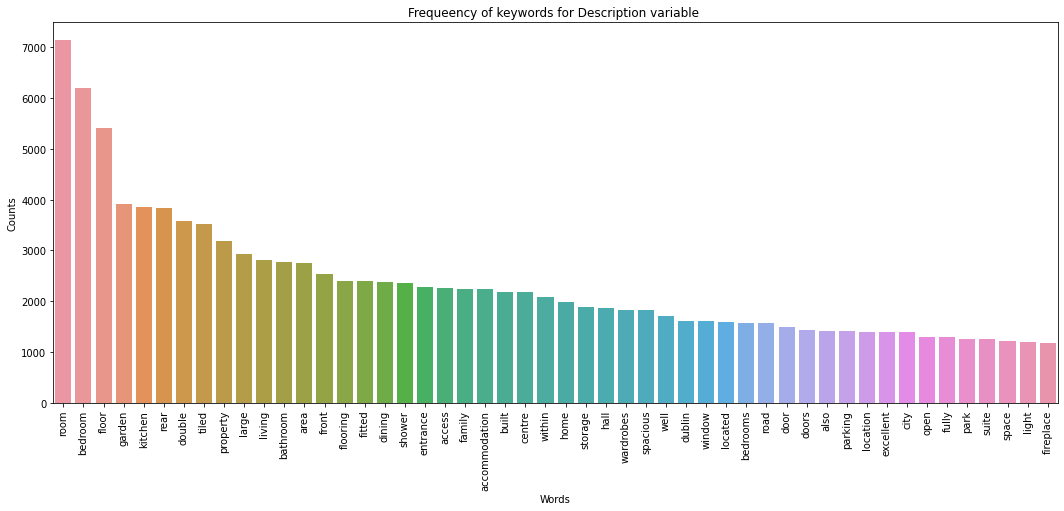

In [61]:

sorted_counter = dict(sorted(description_count.items(), key=lambda x: x[1], reverse=True))
words = list(sorted_counter.keys())[0:50]
count = list(sorted_counter.values())[0:50]

description_word_count=pd.DataFrame(words, columns=['Words'])
description_word_count['Counts'] = count


plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Words', y='Counts', data=description_word_count, order=description_word_count.sort_values('Counts', ascending=False).Words)
plt.xticks(rotation=90)
plt.title("Frequeency of keywords for Description variable ")
plt.show()

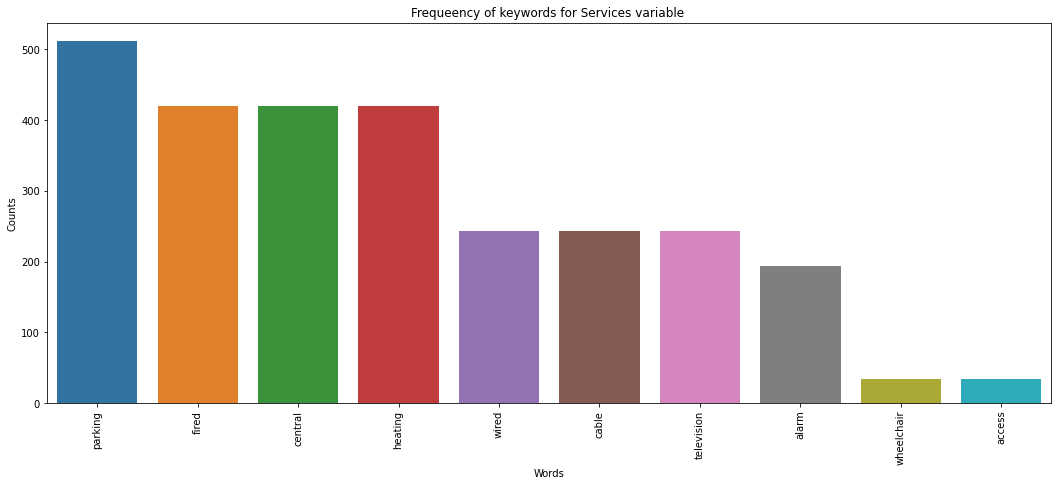

In [62]:

sorted_counter = dict(sorted(services_count.items(), key=lambda x: x[1], reverse=True))
words = list(sorted_counter.keys())[0:50]
count = list(sorted_counter.values())[0:50]

services_word_count=pd.DataFrame(words, columns=['Words'])
services_word_count['Counts'] = count


plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Words', y='Counts', data=services_word_count, order=services_word_count.sort_values('Counts', ascending=False).Words)
plt.xticks(rotation=90)
plt.title("Frequeency of keywords for Services variable ")
plt.show()

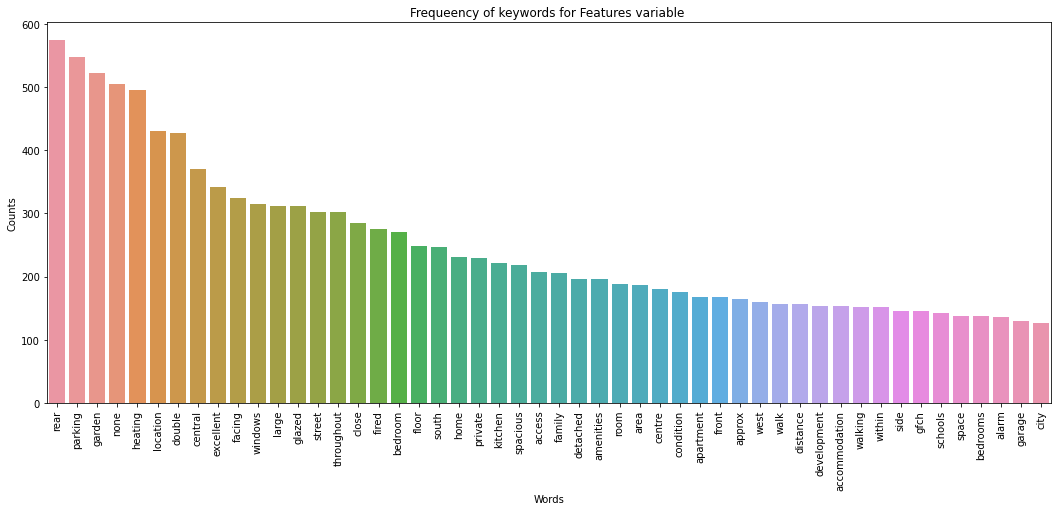

In [64]:

sorted_counter = dict(sorted(feature_count.items(), key=lambda x: x[1], reverse=True))
words = list(sorted_counter.keys())[0:50]
count = list(sorted_counter.values())[0:50]

features_word_count=pd.DataFrame(words, columns=['Words'])
features_word_count['Counts'] = count


plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Words', y='Counts', data=features_word_count, order=features_word_count.sort_values('Counts', ascending=False).Words)
plt.xticks(rotation=90)
plt.title("Frequeency of keywords for Features variable ")
plt.show()

In [65]:
corpus_df = train_txt_clean['Description'] + '' + train_txt_clean['Services'] + ''  + train_txt_clean['Features']
corpus = corpus_df.tolist()


In [66]:
tf_idf_Transform = TfidfTransformer(use_idf=True)
CV = CountVectorizer()
word_count = CV.fit_transform(corpus)
tf_idf_fit = tf_idf_Transform.fit_transform(word_count)
dataframe = pd.DataFrame(tf_idf_fit[0].T.todense(), index=CV.get_feature_names(), columns=['TF-IDF'])
dataframe = dataframe.sort_values('TF-IDF', ascending=False)
print(dataframe.head(15))

               TF-IDF
chipping     0.376804
extensively  0.347049
apartment    0.166135
showernone   0.161507
bedroom      0.158304
management   0.157030
designated   0.154878
meticulous   0.154464
core         0.144538
ongar        0.144538
suite        0.143656
viewers      0.136011
large        0.134386
laminate     0.133301
comes        0.131635


In [67]:
dataframe.reset_index(inplace=True)
dataframe = dataframe[0:50]
dataframe = dataframe.rename(columns = {'index':'Words'}) 

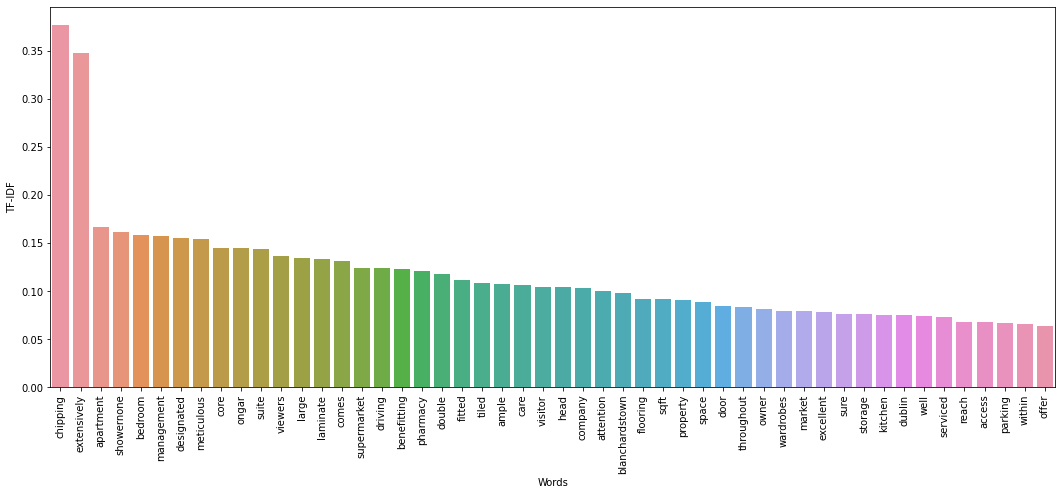

In [68]:
plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Words', y='TF-IDF', data=dataframe, order=dataframe.sort_values('TF-IDF', ascending=False).Words)
plt.xticks(rotation=90)
plt.show()

Use this to engineer new binary features which tell if a specific feature is listed in a properties Description, Service or Feature variable

I will look to find common faciiliters or ammenities which would make a property attractive to a buyer.

In [69]:
new_features = {'extra_space':0,'has_garden':0,'near_transport':0,'near_school':0,'amenities_nearby':0}
df_train = df_train.join(pd.DataFrame(new_features,index=df_train))

df_test = df_test.join(pd.DataFrame(new_features,index=df_test))

df_train.head(3)

,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,has_garden,near_transport,near_school,amenities_nearby
Index,,,,,,,,,,,,,,
1,2,2,9,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,2,67.00,NaN,NaN,NaN,NaN
2,1,2,10,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,4,95.97,NaN,NaN,NaN,NaN
3,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,6,107.00,NaN,NaN,NaN,NaN


In [70]:
train_corpus = train_txt_clean['Description'] + '' + train_txt_clean['Services'] + ''  + train_txt_clean['Features']
df_train = pd.concat([df_train,train_corpus],axis=1)
df_train.rename(columns = {0:'txt_data'},inplace=True) 
df_train.drop(['Description','Services','Features'],axis=1, inplace=True)

df_train.head()

test_corpus = test_txt_clean['Description'] + '' + test_txt_clean['Services'] + ''  + test_txt_clean['Features']
df_test = pd.concat([df_test,test_corpus],axis=1)
df_test.rename(columns = {0:'txt_data'},inplace=True) 
df_test.drop(['Description','Services','Features'],axis=1, inplace=True)


In [71]:
_extraSpace = ['garage','large','spacious','space']
_garden = ["garden","patio"]
_nearTransport = ['bus','walk','transport']
_nearSchool = ['school','primary school','secondary school']
_nearAmenities = ['shop','pharmacy','supermarket','amenity']

In [72]:
def check_features(word_list,txt_example):
  string = str(txt_example)
  res = [ele for ele in word_list if(ele in string)]
  return res

def create_nlp_feats(df_train):
  for index, row in df_train.iterrows():
    example = df_train.loc[index, 'txt_data']
    
    if check_features(_extraSpace,example):df_train.loc[index,'extra_space']=1
    else: df_train.loc[index,'extra_space']=0

    if check_features(_garden,example):df_train.loc[index,'has_garden']=1
    else: df_train.loc[index,'has_garden']=0

    if check_features(_nearTransport,example):df_train.loc[index,'near_transport']=1 
    else: df_train.loc[index,'near_transport']=0

    if check_features(_nearSchool,example):df_train.loc[index,'near_school']=1 
    else: df_train.loc[index,'near_school']=0
  
    if check_features(_nearAmenities,example):df_train.loc[index,'amenities_nearby']=1 
    else: df_train.loc[index,'amenities_nearby']=0
  
  return df_train

In [74]:
df_train = create_nlp_feats(df_train)
df_test = create_nlp_feats(df_test)

df_train.drop(['txt_data'],axis=1,inplace=True)
df_test.drop(['txt_data'],axis=1,inplace=True)

In [78]:
df_train.describe()
#df_test.describe()


,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,has_garden,near_transport,near_school,amenities_nearby
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,1.996289,2.973408,10.946815,53.351080,-6.258055,4.542981,118.204002,0.794063,0.646259,0.621521,0.777984
std,1.013516,1.099577,3.821790,0.074032,0.091837,2.162527,86.343714,0.404510,0.478278,0.485158,0.415730
min,1.000000,1.000000,1.000000,53.215381,-6.497000,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,8.000000,53.294461,-6.309640,2.000000,72.400000,1.000000,0.000000,0.000000,1.000000
50%,2.000000,3.000000,11.000000,53.341263,-6.247912,4.000000,96.480000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,4.000000,14.000000,53.382401,-6.194687,6.000000,134.000000,1.000000,1.000000,1.000000,1.000000
max,8.000000,6.000000,17.000000,53.630588,-6.054719,9.000000,1195.000000,1.000000,1.000000,1.000000,1.000000


## Building a ML model to predict house prices

# Full Regression Model


In [80]:
#df_train.head()
df_train.columns

Index(['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude', 'Longitude',
       'Type', 'Surface', 'has_garden', 'near_transport', 'near_school',
       'amenities_nearby'],
      dtype='object')

In [85]:
feats_train = ['Num_Bathrooms', 'Num_Beds', 'BER_class','Latitude', 'Longitude', 'Type', 'Surface','extra_space', 'has_garden', 'near_transport', 'near_school','amenities_nearby']

# # dropna: remove missing values
df_train_pw = df_train[feats_train].dropna(axis=0)
df_train_cost = df_cost[df_cost.index.isin(df_train_pw.index)]
     
df_test_pw  =  df_test[feats_train].dropna(axis=0)


In [88]:
X_train , X_val, y_train, y_val = train_test_split(df_train_pw,df_train_cost,test_size = 0.25, random_state = rand_state)

In [89]:
# train set, inputs
Xs_train = X_train.values

# train set, output variable, price
ys_train = y_train.values.reshape(-1,1)

# validation set, will be used to evaluate models performance
Xs_val = X_val.values
ys_val = y_val.values


#test set, inputs, will be used to make predictions for the submission
Xs_test = df_test_pw.values

# X_train_index = X_train.index
# y_train_index = y_train.index
# X_val_index = X_val.index
# y_val_index = y_val.index

# X_test  = df_test_pw.index


In [90]:
# X_train_index = X_train.index
# y_train_index = y_train.index
# X_val_index = X_val.index
# y_val_index = y_val.index

X_test_index  = df_test_pw.index
#X_test_index

In [91]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_val = np.hstack([Xs_val,Xs_val[:,[2]]**2])
Xn_val = xscaler.transform(Xss_val)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [92]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,056.5


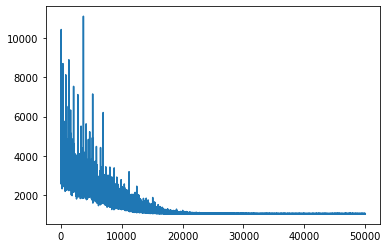

In [93]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [94]:
# samples from the posterior
posterior = approximation.sample(5000)

In [95]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("RMSLE on the validation data = ",(rmsle(y_pred_BLR,ys_val)))
print("MAE on the validation data = ",(np.mean(abs(y_pred_BLR - ys_val) )))
print("MAPE on the validation data = ",(np.mean(abs(y_pred_BLR - ys_val) / ys_val)))

RMSLE on the validation data =  0.317141056407939
MAE on the validation data =  148112.16024697505
MAPE on the validation data =  0.26142028189142336


In [96]:
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_submission_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]


# This code is for saving the kaggle submission predictions to a CSV file on my google drive

# submission_pred = pd.DataFrame(y_submission_BLR)

# index = pd.Series(df_test.index.to_list())
# submission_data = pd.concat([index,submission_pred],axis=1)
# submission_data.set_axis(['Index','Price'],axis=1,inplace=True)
# submission_data.set_index('Index',inplace=True)
# submission_data.to_csv(Path+'ET5003_Kaggle_BarryLawton_20197772_full_regression.csv',index=True)

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

############################

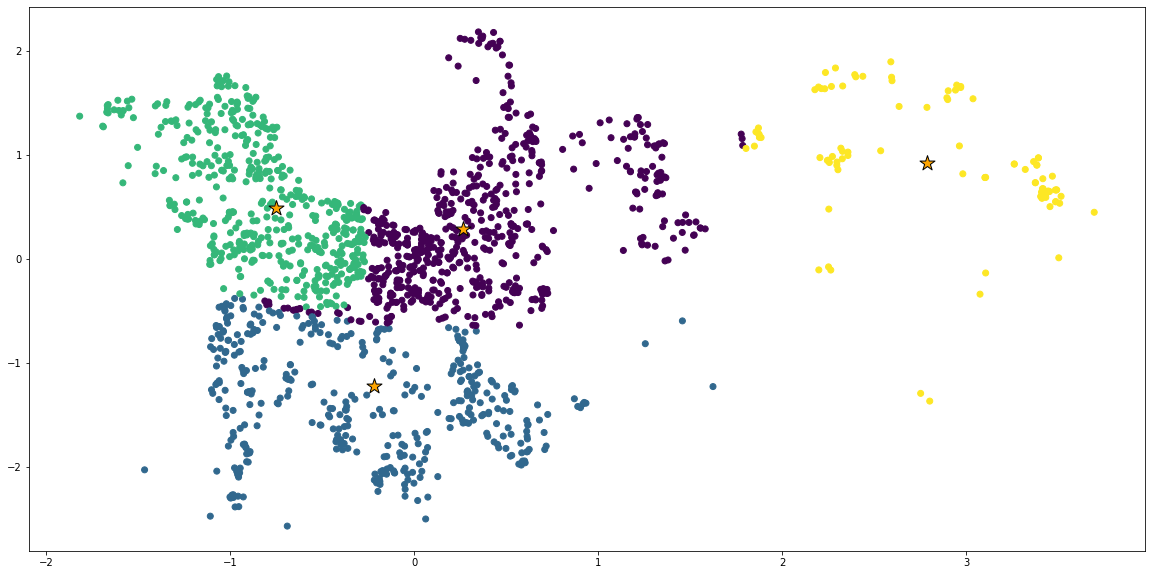

In [97]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
# clustering by features longitude and latitude
ind=[3,4]
X_ind = np.vstack([Xn_train[:,ind],Xn_val[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)

labels = gmm.fit_predict(X_ind)

# plot blue dots
plt.figure(figsize=(20,10))
plt.scatter(X_ind[:,0],X_ind[:,1],c=labels)
# centroids:  orange stars
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],color='orange',edgecolor= 'black',marker='*',s=250)

In [98]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))



{0: 466, 1: 312, 2: 359, 3: 75}

In [99]:
# validation clusters
clusters_val = gmm.predict(Xn_val[:,ind])
unique_val, counts_val = np.unique(clusters_val, return_counts=True)
dict(zip(unique_val, counts_val))



{0: 150, 1: 97, 2: 137, 3: 21}

In [100]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xvaln0 = Xn_val[clusters_val==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)


In [101]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xvaln1 = Xn_val[clusters_val==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [102]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xvaln2 = Xn_val[clusters_val==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)


In [103]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xvaln3 = Xn_val[clusters_val==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Model

In [104]:
def piecewise_model(Xn0, yn0, iter = 40000, samples = 5000):
  # model_0
 with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])


 with model_0:
  # iterate the algorithm
  approximation = pm.fit(40000,method='advi')

 posterior = approximation.sample(5000)
 return posterior

In [105]:
posterior0 = piecewise_model(Xn0, yn0)

Finished [100%]: Average Loss = 489.46


In [106]:
posterior1 = piecewise_model(Xn1, yn1)

Finished [100%]: Average Loss = 280.93


In [107]:
posterior2 = piecewise_model(Xn2, yn2)

Finished [100%]: Average Loss = 247.12


In [108]:
posterior3 = piecewise_model(Xn3, yn3)

Finished [100%]: Average Loss = 130.37


In [109]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred


##Simulations

### Only Cluster 0

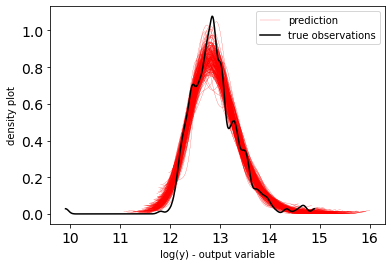

In [110]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Only Cluster 1

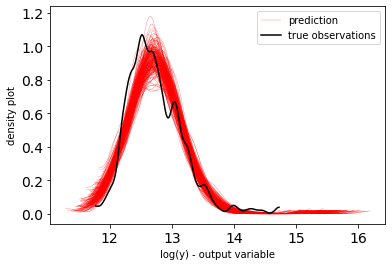

In [111]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Only Cluster 2


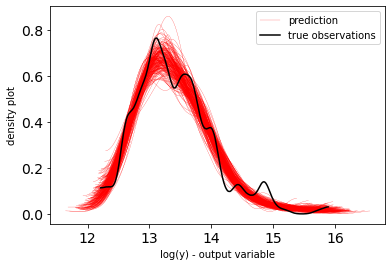

In [112]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Only Cluster 3

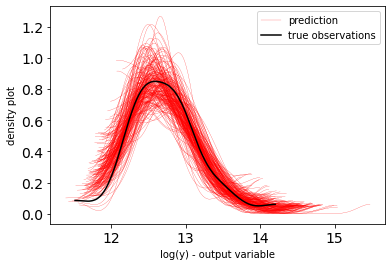

In [113]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

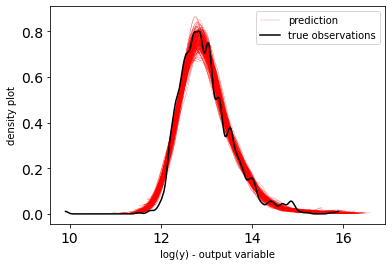

In [114]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Test set performance

In [115]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xvaln0.T)))
print("Size Cluster0", np.sum(clusters_val==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - ys_val[clusters_val==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xvaln1.T)))
print("Size Cluster1", np.sum(clusters_val==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - ys_val[clusters_val==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xvaln2.T)))
print("Size Cluster2", np.sum(clusters_val==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - ys_val[clusters_val==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xvaln3.T)))
print("Size Cluster3", np.sum(clusters_val==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - ys_val[clusters_val==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - ys_val[clusters_val==0]),
                 abs(y_pred_BLR1 - ys_val[clusters_val==1]),
                 abs(y_pred_BLR2 - ys_val[clusters_val==2]),
                 abs(y_pred_BLR3 - ys_val[clusters_val==3])])

# MAE
print("MAE on the test dataset =",np.mean(joint))

Size Cluster0 150 , MAE Cluster0= 98164.86685068875
Size Cluster1 97 , MAE Cluster1= 68399.74400940594
Size Cluster2 137 , MAE Cluster2= 468498.1514806524
Size Cluster3 21 , MAE Cluster3= 65227.88128154894
MAE on the test dataset = 214601.32705253726



### PPC on the validation set



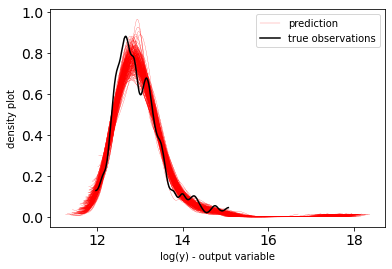

In [116]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xvaln0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xvaln1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xvaln2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xvaln3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(ys_val),color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

########################

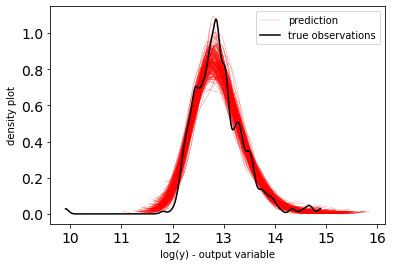

In [117]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))

Ysub_pred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))

for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

#### Submission Piecewise Predictions

In [118]:
#submission prediction clusters

clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
print(dict(zip(unique_test, counts_test)))


#cluster 0 
Xtestn0 = Xn_test[clusters_test == 0,:]

#cluster 1 
Xtestn1 = Xn_test[clusters_test == 1,:]

#cluster 2 
Xtestn2 = Xn_test[clusters_test == 2,:]

#cluster 3
Xtestn3 = Xn_test[clusters_test == 3,:]


# cluster 0 prediction
y_sub_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))

# cluster 1 prediction
y_sub_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))

# cluster 1 prediction
y_sub_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))

# cluster 3 prediction
y_sub_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))


{0: 287, 1: 159, 2: 217, 3: 39}


In [120]:
pred_list = []

i_0 = 0
i_1 = 0
i_2 = 0
i_3 = 0

for c in clusters_test:
  if c ==0:
    pred_list.append(y_sub_pred_BLR0[i_0])
    i_0 += 1
  elif c ==1:
    pred_list.append(y_sub_pred_BLR1[i_1])
    i_1 += 1
  elif c ==2:
    pred_list.append(y_sub_pred_BLR2[i_2])
    i_2 += 1
  elif c ==3:
    pred_list.append(y_sub_pred_BLR3[i_3])
    i_3 += 1
    

In [136]:
# This code is for saving the kaggle submission predictions to a CSV file on my google drive
# I need to find a list of index for each cluster and then combine to make submission list


# submission_pred = pd.DataFrame(pred_list)

# index = pd.Series(df_test.index.to_list())
# submission_data = pd.concat([index,submission_pred],axis=1)
# submission_data.set_axis(['Index','Price'],axis=1,inplace=True)
# submission_data.set_index('Index',inplace=True)
# submission_data.to_csv(Path+'ET5003_Kaggle_BarryLawton_20197772_piecewise_reg.csv',index=True)

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [124]:
# WIP: For reference - Bayesian NN 

# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [125]:
# this can be slow because there are many parameters

# some parameters
par1 = 100  # start with 100, then use 1000+
par2 = 1000 # start with 1000, then use 10000+

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 454 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [126]:
# we can do instead an approximated inference
param3 = 25000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.005    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 783.68


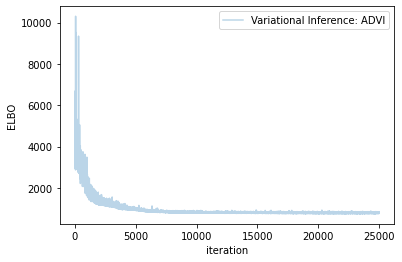

In [127]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [128]:
# draw samples from variational posterior
D = 500
posterior = approx.sample(draws=D)

Predict prices for the validation data and evaluate the model performance

In [129]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_val_pred = np.array(y_pred).mean(axis=0)

In [130]:
# Apply inverse transform to rescale the predictions back to Property prices
y_val_pred_price = np.exp(yscaler.inverse_transform(y_val_pred))

print('The RMSLE of the Bayesian Neuaral Network on the validation data = ',rmsle(ys_val,y_val_pred_price))
print('The MAE of the Bayesian Neuaral Network on the validation data = ',mean_absolute_error(ys_val,y_val_pred_price))

The RMSLE of the Bayesian Neuaral Network on the validation data =  0.2199520149097807
The MAE of the Bayesian Neuaral Network on the validation data =  95796.4988389442


### Predict Prices for submission test data

In [131]:
# add a column of ones to include an intercept in the model

x3 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x3.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_sub_pred = np.array(y_pred).mean(axis=0)

In [132]:
# Apply inverse transform to rescale the predictions back to Property prices
y_sub_pred_price = np.exp(yscaler.inverse_transform(y_sub_pred))

In [133]:
# This code is for saving the kaggle submission predictions to a CSV file on my google drive

# submission_BNN_pred = pd.DataFrame(y_sub_pred_price)

# index = pd.Series(df_test.index.to_list())
# submission_data = pd.concat([index,submission_BNN_pred],axis=1)
# submission_data.set_axis(['Index','Price'],axis=1,inplace=True)
# submission_data.set_index('Index',inplace=True)
# submission_data.to_csv(Path+'ET5003_Kaggle_BarryLawton_20197772_BayesianNN.csv',index=True)

# SUMMARY

This assignment sought to compare how well different Machine Learning techniques were able to predict house prices on the properties advertisement data.

First I prepressed the data as outlined above. After perforoming EDA on the training dataset I noticed it contained some numerical outliers which were removed using an Interquartile Range Method. Initially this outlier removal technique was applied to the features `Num_Beds`, `Num_Bathrooms` & `Surface` however afterwards I noticed this made predicting prices on the Kaggle submission difficult as far too many properties with high surface area were being removed causing for some excessively large predictions. On subsequent runs I opted to only remove outliers with a `Surface` above 5000, this helped to produce more accurate predictions overall.
For the cathegorical data, I encoded both `Ber_Class` and `Property_type` with a numerical mapper as both could be viewed as ordinal variables. 


Then I sought to apply a variety of Machine Learning techniques compare their performance at predicting property prices, the techniques used were:    
* NLP using TF-IDF vectorizer to a Random Forest Regressor
*Utilising NLP to create new variables from the text variables `Description`, `Services` & `Features`
*Full Bayesian regression model
*Bayesian Piecewise regression model
*Bayesian Neural Network
 
The results produced were interesting;
I would have expected the Random Forest Regressor to perform very poorly as I implemneted this model with the 3 text variables only. However the results  achieved were quite reasonable and exceeded my expectations, with RMSLE = 0.4 on the validation set. This seems to indicate that the Term Frequency - Inverserse Term Frequency (TF-IDF) method of ranking the presence of certain n-grams in the dataset holds a good indication as what a property price might be.  
Underneath this section I decided to use a different approach to the NLP aspect of this etivity. Based on recommendations from my peers I opted to use the TF-IDF and CountVectorizer methods to investigate some of the most frequent and more important words featured in the variables `Description`, `Services` & `Features`. Utilising this analysis I created new binary features which looked to find keywords in the text data of desrible features for prospective buyer.
The features created were:
* `extra_space`
* `has_garden`
* `near_transport`
* `near_school`
* `amenities_nearby`
These features were then added in to the existing dataset.

Then I compared the performance of 3 different Bayesian ML models.
As a baseline I implemented Full bayesian Regression model.
As a comparative I produced a Bayesian Piecewise Regression model
Lastly I implemented a Bayesian Neural Network.

The Piecewise or segmented regression model only outperformed the full regression model when the NLP features were not included in the training data.  In this scenario both  the accuracy on the validation data but also on the submissions to the Kaggle competition were more accurate. However when the training data included the NLP created features the full regression model actually performed better. 

The model which consistently produced the best accuracy both on the validation data set and on the Kaggle submissions was the Bayesian Neural Network. This is not surprising as this technique trains a model extensively to fit the data, optimising the model weights over multiple iterations. It took substantially more time to train but the end result was more robust 


In [137]:
# %%capture
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('ET5003_Etivity2_BarryLawton_20149743.ipynb')

